In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import boltzmann
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.gridspec as gridspec
import scipy.integrate as it
from tqdm import tqdm 
import time
from scipy import linalg
from scipy.linalg import *
import multiprocessing
import os.path
from os import path
from numpy import convolve
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from scipy.optimize import curve_fit
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from os.path import expanduser
import matplotlib.font_manager as font_manager
from mpl_toolkits import mplot3d
#for font in font_manager.findSystemFonts():
#    print(font)
fontpath = expanduser('/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf')
fontpath = expanduser('/home/akrotz/Documents/Research/pyMQC/fonts/truetype/msttcorefonts/Times_New_Roman.ttf')
#fontpath = expanduser('/usr/share/fonts/opentype/urw-base35/NimbusRoman-Regular.otf')
prop = font_manager.FontProperties(fname=fontpath)
mpl.rcParams['font.family'] = prop.get_name()
#print(mpl.rcParams['font.family'])
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.rm']=prop.get_name()
#print(mpl.rcParams.keys())
nice_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.serif" : "Times New Roman",
    "font.weight"  : "bold",
}
mpl.rcParams.update(nice_fonts)

In [2]:

def fname(n,m):
    foldername = 'n_'+str(n)+'_m_'+str(m)+'_dat/n_'+str(n)+'_m_'+str(m)+'_'
    return foldername

def load_data(n,m,dataname,trial):
    out_name = fname(n,m)+dataname+'_'+str(trial)+'.dat'
    dat = np.loadtxt(out_name)
    return dat
infec_time = 14
def update_colors(status):
    colors = []
    for n in status:
        if n >= 1 and n < infec_time:
            colors.append('red')
        if n < 1 or n >= infec_time:
            colors.append('blue')
    return colors      

def update_colors_list(status_list):
    n=0
    for status in status_list:
        colors = update_colors(status)
        if n == 0:
            colors_out = colors
        else:
            colors_out = np.vstack((colors_out,colors))
        n += 1
    return colors_out
def save_graph(adj_mat, colors):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 5), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    #nx.draw_networkx_labels(graph,pos)

    cut = 1.02
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    xmin = cut * min(xx for xx, yy in pos.values())
    ymin = cut * min(yy for xx, yy in pos.values())
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig    
    
#for m in range(1,9):
#    print(m)
#    adj_mat = load_data(30,m,'ADJ_MAT',15)
#    rows, cols = np.where(adj_mat == 1)
#    edges = zip(rows.tolist(), cols.tolist())
#    graph = nx.Graph()
#    graph.add_edges_from(edges)
#    pos = nx.spring_layout(graph,seed=12342)
#    cut = 1.1
#    xmax = cut * max(xx for xx, yy in pos.values())
#    ymax = cut * max(yy for xx, yy in pos.values())
#    xmin = cut * min(xx for xx, yy in pos.values())
#    ymin = cut * min(yy for xx, yy in pos.values())
#    print(xmin,xmax,ymin,ymax)
    
def gen_imgs(n,m,traj_n):
    status_dat = load_data(n,m,'STATUS',traj_n)
    color_dat = update_colors_list(status_dat)
    s_dat_traj = load_data(n,m,'S',traj_n)/n**2
    i_dat_traj = load_data(n,m,'I',traj_n)/n**2
    r_dat_traj = load_data(n,m,'R',traj_n)/n**2
    s_dat_tot = load_data(n,m,'S','tot')
    i_dat_tot = load_data(n,m,'I','tot')
    r_dat_tot = load_data(n,m,'R','tot')
    t_dat = load_data(n,m,'T','')
    adj_mat = load_data(n,m,'ADJ_MAT',traj_n)
    rows, cols = np.where(adj_mat == 1)
    edges = zip(rows.tolist(), cols.tolist())
    graph = nx.Graph()
    graph.add_edges_from(edges)
    pos = nx.spring_layout(graph,seed=12342)
    cut = 1.1
    xmax = 1.1#cut * max(xx for xx, yy in pos.values())
    ymax = 1.1#cut * max(yy for xx, yy in pos.values())
    xmin = -1.1#cut * min(xx for xx, yy in pos.values())
    ymin = -1.1#cut * min(yy for xx, yy in pos.values())
    for t in tqdm(t_dat):
        t = int(t)
    #if True:
    #    t=int(t_dat[-1])
        heights = [1]
        aspect = 6
        fig = plt.figure(tight_layout=False,dpi=300)
        spec = gridspec.GridSpec(ncols=2,nrows=1,figure=fig,height_ratios=heights)
        ax1 = fig.add_subplot(spec[0])
        ax2 = fig.add_subplot(spec[1])
        nx.draw(graph,pos,node_color=color_dat[int(t)],node_size=20)
        #nx.draw_networkx_nodes(graph,pos,node_color=color_dat[0])
        #nx.draw_networkx_edges(graph,pos)
        ax2.set_xlim(xmin, xmax)
        ax2.set_ylim(ymin, ymax)
        ax2.set_title('Barabasi-Albert Graph, N='+str(n**2)+', M = '+str(m))
        ax2.text(-1,-1.25,'Dashed lines correspond to the graph above\n Solid lines are averages of 100 trials.')
    
        ax1.plot(t_dat[:t], s_dat_tot[:t],color='black',label=r"$\langle S \rangle$")
        ax1.plot(t_dat[:t], i_dat_tot[:t],color='red',label=r"$\langle I \rangle$")
        ax1.plot(t_dat[:t], r_dat_tot[:t],color='green',label=r"$\langle R \rangle$")
        ax1.plot(t_dat[:t],s_dat_traj[:t],color='black',linestyle='dashed',alpha=0.5)
        ax1.plot(t_dat[:t],i_dat_traj[:t],color='red',linestyle='dashed',alpha=0.5)
        ax1.plot(t_dat[:t],r_dat_traj[:t],color='green',linestyle='dashed',alpha=0.5)
        ax1.set_yticks([0,.2,.4,.6,.8,1.0])
        ax1.set_yticklabels([r"$0$",r"$20$",r"$40$",r"$60$",r"$80$",r"$100$",])
        ax1.set_ylim([0,1])
        #ax1.legend()
        leg=ax1.legend(loc='upper right')
        leg.get_frame().set_linewidth(0.0)
        ax1.set_title('Susceptible, Infected, Recovered (SIR)')
        ax1.set_ylabel(r'$Pop.(\%)$')
        ax1.set_xlabel('Days')
        fig.set_figwidth(7.0)
        fig.set_figheight(4.0)
        plt.subplots_adjust(right=.99,left=0.075,top=0.92,bottom=0.15,hspace=0.1,wspace=0.1)
        plt.savefig('n_'+str(n)+'_m_'+str(m)+'_pics/pic_'+str(int(t))+'.png')
        plt.close()
        #plt.show()
    return
    
    
gen_imgs(30,5,15)


100%|██████████| 500/500 [06:59<00:00,  1.19it/s]


In [ ]:
gen_imgs(30,1,15)

  4%|▍         | 21/500 [00:17<11:56,  1.50s/it]

In [97]:
n=30
m1_S = load_data(n,1,'S','tot')
m1_I = load_data(n,1,'I','tot')
m1_R = load_data(n,1,'R','tot')
m1_I_1 = load_data(n,1,'I','5')
m1_stat_1 = load_data(n,1,'STATUS','5')
print(m1_stat_1)
m1_col_1 = update_colors_list(m1_stat_1)
T = load_data(n,1,'T','')

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [88. 93. 91. ...  0.  0.  0.]
 [89. 94. 92. ...  0.  0.  0.]
 [90. 95. 93. ...  0.  0.  0.]]


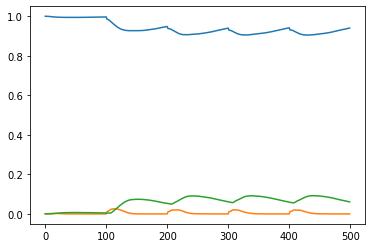

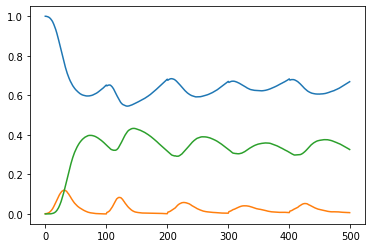

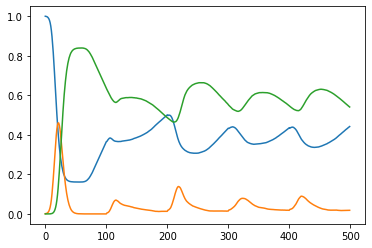

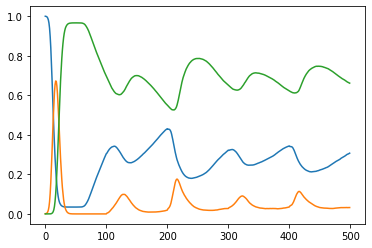

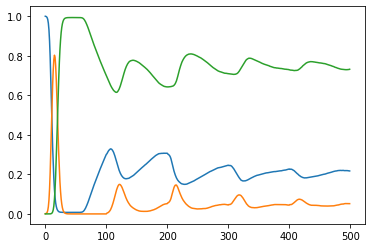

In [64]:
#plt.plot(T,n50m1_I)
#plt.plot(T,n50m2_I)
#plt.plot(T,n50m3_I)
plt.plot(T,m1_S)
plt.plot(T,m1_I)
plt.plot(T,m1_R)
plt.show()
plt.plot(T,m2_S)
plt.plot(T,m2_I)
plt.plot(T,m2_R)
plt.show()
plt.plot(T,m4_S)
plt.plot(T,m4_I)
plt.plot(T,m4_R)
plt.show()
plt.plot(T,m6_S)
plt.plot(T,m6_I)
plt.plot(T,m6_R)
plt.show()
plt.plot(T,m8_S)
plt.plot(T,m8_I)
plt.plot(T,m8_R)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import networkx as nx

def save_graph(graph,colors,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    #nx.draw_networkx_labels(graph,pos)

    cut = 1.02
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    xmin = cut * min(xx for xx, yy in pos.values())
    ymin = cut * min(yy for xx, yy in pos.values())
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig
g = nx.generators.random_graphs.barabasi_albert_graph(30**2,1)
#Assuming that the graph g has nodes and edges entered
save_graph(g,"my_graph.pdf")

#it can also be saved in .svg, .png. or .ps formats